Data Science Career Track (Springboard/DataCamp, 5/7 - 1/15/2019)
Topic: Capstone Project - 911 Police Calls for Service EDA, (Baltimore, MD)
Student: Franklin Cid
Mentor: Milad Toutounchian

#0 Import packages and visualization libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

#1 read 911 calls

In [3]:
c911 = pd.read_csv('Data/w911PoliceCalls_BaltimoreMD.csv')

#2 Pull c911 into a df, drop unneeded columns. Change colName 'description' to 'callType'

In [4]:
#df911 = pd.DataFrame(c911, columns=['callDateTime', 'priority', 'district', 'description', 'location'])
df911 = pd.DataFrame(c911, columns=['callDateTime', 'priority', 'district', 'description',
    'location']).set_index('callDateTime', drop=False)

df911.columns = df911.columns.str.replace('description','callType')
df911.head(6)

,callDateTime,priority,district,callType,location
callDateTime,,,,,
08/10/2017 03:25:00 PM,08/10/2017 03:25:00 PM,Low,ND,LARCENY,"3100 ST PAUL ST\nBALTIMORE, MD\n(39.326142, -7..."
08/23/2017 12:53:00 PM,08/23/2017 12:53:00 PM,Medium,NE,911/NO VOICE,"3300 BELAIR RD\nBALTIMORE, MD\n(39.321622, -76..."
08/07/2017 06:57:00 PM,08/07/2017 06:57:00 PM,Medium,ED,911/NO VOICE,"500 E PRESTON ST\nBALTIMORE, MD\n(39.304786, -..."
08/18/2017 09:05:00 PM,08/18/2017 09:05:00 PM,Low,NW,AUTO ACCIDENT,"3600 REISTERSTOWN RD\nBALTIMORE, MD\n(39.32903..."
06/27/2015 03:12:00 PM,06/27/2015 03:12:00 PM,Non-Emergency,ND,LOUD MUSIC,"W MORTON ST\nBALTIMORE, MD"
08/23/2017 10:09:00 AM,08/23/2017 10:09:00 AM,High,NW,AUDIBLE ALARM,"3700 MILFORD AV\nBALTIMORE, MD\n(39.334517, -7..."


#3 Cast callDateTime => dateTime (no date fx available), new col=dT

In [5]:
#import timeit #%%timeit # do it 100x; -n 100
df911['dT'] =pd.to_datetime(df911.callDateTime)
df911.head(6) #chk

,callDateTime,priority,district,callType,location,dT
callDateTime,,,,,,
08/10/2017 03:25:00 PM,08/10/2017 03:25:00 PM,Low,ND,LARCENY,"3100 ST PAUL ST\nBALTIMORE, MD\n(39.326142, -7...",2017-08-10 15:25:00
08/23/2017 12:53:00 PM,08/23/2017 12:53:00 PM,Medium,NE,911/NO VOICE,"3300 BELAIR RD\nBALTIMORE, MD\n(39.321622, -76...",2017-08-23 12:53:00
08/07/2017 06:57:00 PM,08/07/2017 06:57:00 PM,Medium,ED,911/NO VOICE,"500 E PRESTON ST\nBALTIMORE, MD\n(39.304786, -...",2017-08-07 18:57:00
08/18/2017 09:05:00 PM,08/18/2017 09:05:00 PM,Low,NW,AUTO ACCIDENT,"3600 REISTERSTOWN RD\nBALTIMORE, MD\n(39.32903...",2017-08-18 21:05:00
06/27/2015 03:12:00 PM,06/27/2015 03:12:00 PM,Non-Emergency,ND,LOUD MUSIC,"W MORTON ST\nBALTIMORE, MD",2015-06-27 15:12:00
08/23/2017 10:09:00 AM,08/23/2017 10:09:00 AM,High,NW,AUDIBLE ALARM,"3700 MILFORD AV\nBALTIMORE, MD\n(39.334517, -7...",2017-08-23 10:09:00


#4 Set the INDEX and SORT before filtering the target dataset (Jan/2015, Jan/2016, Jan/2017)
#df.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [6]:
df911.set_index('dT', drop=True)
df911.sort_values(by='dT', inplace=True)
df911.head(6) #chk

,callDateTime,priority,district,callType,location,dT
callDateTime,,,,,,
01/01/2015 12:01:00 AM,01/01/2015 12:01:00 AM,High,NW,Dischrg Firearm,"SPAULDING AV\nBALTIMORE, MD",2015-01-01 00:01:00
01/01/2015 12:01:00 AM,01/01/2015 12:01:00 AM,High,SW,Shooting,"3900 ROKEBY RD\nBALTIMORE, MD\n(39.29935, -76....",2015-01-01 00:01:00
01/01/2015 12:01:00 AM,01/01/2015 12:01:00 AM,Low,SW,Other,"500 N ATHOL AV\nBALTIMORE, MD\n(39.290987, -76...",2015-01-01 00:01:00
01/01/2015 12:02:00 AM,01/01/2015 12:02:00 AM,Low,SW,Subject stop,"3400 BLK W FRANKLIN ST\nBALTIMORE, MD\n(39.292...",2015-01-01 00:02:00
01/01/2015 12:02:00 AM,01/01/2015 12:02:00 AM,High,SW,Dischrg Firearm,"2700 ST BENEDICT ST\nBALTIMORE, MD\n(39.278843...",2015-01-01 00:02:00
01/01/2015 12:02:00 AM,01/01/2015 12:02:00 AM,High,NE,Dischrg Firearm,"3000 18 ECHODALE AV\nBALTIMORE, MD\n(39.349622...",2015-01-01 00:02:00


#5 Create needed columns for manipulating/grouping data later.
#Calculate the dateparts for yr and dy


In [7]:
df911['yr'] = ''; df911['dy'] = ''
df911.yr = pd.DatetimeIndex(df911.dT).year
df911.dy = pd.DatetimeIndex(df911.dT).day
df911.tail() #chk

,callDateTime,priority,district,callType,location,dT,yr,dy
callDateTime,,,,,,,,
10/10/2018 11:43:00 AM,10/10/2018 11:43:00 AM,Low,NE,ESCORT,"5300 MORAVIA RD\nBALTIMORE, MD\n(39.322698, -7...",2018-10-10 11:43:00,2018,10
10/10/2018 11:44:00 AM,10/10/2018 11:44:00 AM,Medium,ED,DISORDERLY,"1300 N MILTON AV\nBALTIMORE, MD\n(39.306168, -...",2018-10-10 11:44:00,2018,10
10/10/2018 11:44:00 AM,10/10/2018 11:44:00 AM,Low,NW,CHECKWELLBEING,"3900 FAIRVIEW AV\nBALTIMORE, MD\n(39.323781, -...",2018-10-10 11:44:00,2018,10
10/10/2018 11:45:00 AM,10/10/2018 11:45:00 AM,Medium,NE,FAMILY DISTURB,"4500 PARKMONT AV\nBALTIMORE, MD\n(39.346539, -...",2018-10-10 11:45:00,2018,10
10/10/2018 11:45:00 AM,10/10/2018 11:45:00 AM,High,NE,SILENT ALARM,"4600 HAMPNETT AV\nBALTIMORE, MD\n(39.342642, -...",2018-10-10 11:45:00,2018,10


#6 Now, pull/filter only months of Jan for 3 yrs(2015, 2016, 2017)='01/2015','01/2016','01/2017'

In [8]:
df9115 = df911.loc[(df911.dT >= '01/2015') & (df911.dT < '02/2015')]
df9116 = df911.loc[(df911.dT >= '01/2016') & (df911.dT < '02/2016')]
df9117 = df911.loc[(df911.dT >= '01/2017') & (df911.dT < '02/2017')]

#df9115.tail() # 83994; location        83976
#df9116.tail() # 80087; location        78081
df9117.tail() #chk 84422; location        82645

,callDateTime,priority,district,callType,location,dT,yr,dy
callDateTime,,,,,,,,
01/31/2017 11:56:00 PM,01/31/2017 11:56:00 PM,Medium,ND,911/NO VOICE,"5200 N CHARLES ST\nBALTIMORE, MD\n(39.358588, ...",2017-01-31 23:56:00,2017,31
01/31/2017 11:56:00 PM,01/31/2017 11:56:00 PM,Low,NW,DESTRUCT PROP,"2600 VIOLET AV\nBALTIMORE, MD\n(39.331225, -76...",2017-01-31 23:56:00,2017,31
01/31/2017 11:56:00 PM,01/31/2017 11:56:00 PM,High,CD,Traffic Stop,"2100 PENNSYLVANIA AV\nBALTIMORE, MD\n(39.30700...",2017-01-31 23:56:00,2017,31
01/31/2017 11:58:00 PM,01/31/2017 11:58:00 PM,Medium,WD,911/NO VOICE,"1200 SMITHSON ST\nBALTIMORE, MD\n(39.30056, -7...",2017-01-31 23:58:00,2017,31
01/31/2017 11:59:00 PM,01/31/2017 11:59:00 PM,Medium,SD,911/NO VOICE,"200 FRANKFURST AV\nBALTIMORE, MD\n(39.241552, ...",2017-01-31 23:59:00,2017,31


#7 Concat 3 dfs. 
#Add new columns splitted from location = street, cityState, lat, long

In [9]:
df911A = pd.concat([df9115, df9116, df9117]) #, ignore_index=True); 248503/244702=loc

df911A['street'] = ''; 
df911A['cityState'] = ''; 
df911A['lat'] = ''
df911A['long'] = ''
df911A['latLong'] = ''  #temp col. will parse lat and long from here.
df911A.head() #chk

,callDateTime,priority,district,callType,location,dT,yr,dy,street,cityState,lat,long,latLong
callDateTime,,,,,,,,,,,,,
01/01/2015 12:01:00 AM,01/01/2015 12:01:00 AM,High,NW,Dischrg Firearm,"SPAULDING AV\nBALTIMORE, MD",2015-01-01 00:01:00,2015,1,,,,,
01/01/2015 12:01:00 AM,01/01/2015 12:01:00 AM,High,SW,Shooting,"3900 ROKEBY RD\nBALTIMORE, MD\n(39.29935, -76....",2015-01-01 00:01:00,2015,1,,,,,
01/01/2015 12:01:00 AM,01/01/2015 12:01:00 AM,Low,SW,Other,"500 N ATHOL AV\nBALTIMORE, MD\n(39.290987, -76...",2015-01-01 00:01:00,2015,1,,,,,
01/01/2015 12:02:00 AM,01/01/2015 12:02:00 AM,Low,SW,Subject stop,"3400 BLK W FRANKLIN ST\nBALTIMORE, MD\n(39.292...",2015-01-01 00:02:00,2015,1,,,,,
01/01/2015 12:02:00 AM,01/01/2015 12:02:00 AM,High,SW,Dischrg Firearm,"2700 ST BENEDICT ST\nBALTIMORE, MD\n(39.278843...",2015-01-01 00:02:00,2015,1,,,,,


#8 Calc 4 cols by parsing from location = [street, cityState, lat, long]

In [10]:
df911A['street'] = df911A.location.str.split('\n').str[0]
df911A['cityState'] = df911A.location.str.split('\n').str[1]
df911A['latLong'] = df911A.location.str.split('\n').str[2]
  #temp col. will parse lat and long from here. >>># Not run as of yet, for testing/verifying
df911A['latLong'] = df911A.latLong.str.replace('(','')
df911A['latLong'] = df911A.latLong.str.replace(')','')
df911A['lat'] = df911A.latLong.str.split(',').str[0]
df911A['long'] = df911A.latLong.str.split(',').str[1]
df911A.tail() #chk

,callDateTime,priority,district,callType,location,dT,yr,dy,street,cityState,lat,long,latLong
callDateTime,,,,,,,,,,,,,
01/31/2017 11:56:00 PM,01/31/2017 11:56:00 PM,Medium,ND,911/NO VOICE,"5200 N CHARLES ST\nBALTIMORE, MD\n(39.358588, ...",2017-01-31 23:56:00,2017,31,5200 N CHARLES ST,"BALTIMORE, MD",39.358588,-76.624529,"39.358588, -76.624529"
01/31/2017 11:56:00 PM,01/31/2017 11:56:00 PM,Low,NW,DESTRUCT PROP,"2600 VIOLET AV\nBALTIMORE, MD\n(39.331225, -76...",2017-01-31 23:56:00,2017,31,2600 VIOLET AV,"BALTIMORE, MD",39.331225,-76.65862,"39.331225, -76.65862"
01/31/2017 11:56:00 PM,01/31/2017 11:56:00 PM,High,CD,Traffic Stop,"2100 PENNSYLVANIA AV\nBALTIMORE, MD\n(39.30700...",2017-01-31 23:56:00,2017,31,2100 PENNSYLVANIA AV,"BALTIMORE, MD",39.307001,-76.638898,"39.307001, -76.638898"
01/31/2017 11:58:00 PM,01/31/2017 11:58:00 PM,Medium,WD,911/NO VOICE,"1200 SMITHSON ST\nBALTIMORE, MD\n(39.30056, -7...",2017-01-31 23:58:00,2017,31,1200 SMITHSON ST,"BALTIMORE, MD",39.30056,-76.637385,"39.30056, -76.637385"
01/31/2017 11:59:00 PM,01/31/2017 11:59:00 PM,Medium,SD,911/NO VOICE,"200 FRANKFURST AV\nBALTIMORE, MD\n(39.241552, ...",2017-01-31 23:59:00,2017,31,200 FRANKFURST AV,"BALTIMORE, MD",39.241552,-76.603559,"39.241552, -76.603559"


In [13]:
# dev/testing block
df911Acopy = df911A.copy() 
df911Acopy.tail() #chk. STILL WORK ON df911A

df9115copy = df9115.copy() 
df9115copy.tail()
### df911A =>>> df911Acopy df = DON'T TOUCH THIS!!!

,callDateTime,priority,district,callType,location,dT,yr,dy
callDateTime,,,,,,,,
01/31/2015 11:58:00 PM,01/31/2015 11:58:00 PM,Medium,SD,*INVEST.TROUBLE,"1400 BL PATAPSCO ST\nBALTIMORE, MD\n(39.274076...",2015-01-31 23:58:00,2015,31
01/31/2015 11:58:00 PM,01/31/2015 11:58:00 PM,Medium,NE,911/No Voice,"6500 BELAIR RD\nBALTIMORE, MD\n(39.35335, -76....",2015-01-31 23:58:00,2015,31
01/31/2015 11:58:00 PM,01/31/2015 11:58:00 PM,Non-Emergency,ND,Repairs/Service,"400 N FRONT ST\nBALTIMORE, MD\n(39.293035, -76...",2015-01-31 23:58:00,2015,31
01/31/2015 11:59:00 PM,01/31/2015 11:59:00 PM,Medium,ED,911/No Voice,"600 N WOLFE ST\nBALTIMORE, MD\n(39.297502, -76...",2015-01-31 23:59:00,2015,31
01/31/2015 11:59:00 PM,01/31/2015 11:59:00 PM,Low,SD,*UNKNOWN PROBLEM,"600 E JEFFREY ST\nBALTIMORE, MD\n(39.233068, -...",2015-01-31 23:59:00,2015,31


## (Once result above is verified correct,) Drop columns: location, latlong, callDateTime (string)

## temp/Skip for now
df911Acopy = df911A.copy() 
df911Acopy.tail() #chk. STILL WORK ON df911A

#9 Drop columns: callDateTime (string), location, latLong
df911A.drop(['callDateTime','location', 'latLong'], axis=1, inplace=True)
df911A.head()  #chk

#10 #Data wrangle: df911A
##a Empty/NULL
##b NaN
##c wrong values???

#11
#reindex on dT??? (datetime type), sort as needed. ['yr', 'dy']
df911A.set_index(['dT'], drop=True)
df911A.sort_values(['dT'], inplace=True)
df911A.head(6)


In [17]:
## (Once result above is verified correct,) Drop columns: location, latlong, callDateTime (string) - Change to CODE to run it...
#9 Drop columns: callDateTime (string), location, latLong
df911A.drop(['callDateTime','location', 'latLong'], axis=1, inplace=True)
df911AcopyDropCols = df911A.copy() 
df911A.head()  #chk

#df911AcopyDropCols.head() #chk
### df911Acopy df = DON'T TOUCH THIS!!!

# DATA READY TO ROLL, SAVE NaN, CallType "test data"?

,priority,district,callType,dT,yr,dy,street,cityState,lat,long
callDateTime,,,,,,,,,,
01/01/2015 12:01:00 AM,High,NW,Dischrg Firearm,2015-01-01 00:01:00,2015,1,SPAULDING AV,"BALTIMORE, MD",NaN,NaN
01/01/2015 12:01:00 AM,High,SW,Shooting,2015-01-01 00:01:00,2015,1,3900 ROKEBY RD,"BALTIMORE, MD",39.29935,-76.682006
01/01/2015 12:01:00 AM,Low,SW,Other,2015-01-01 00:01:00,2015,1,500 N ATHOL AV,"BALTIMORE, MD",39.290987,-76.689237
01/01/2015 12:02:00 AM,Low,SW,Subject stop,2015-01-01 00:02:00,2015,1,3400 BLK W FRANKLIN ST,"BALTIMORE, MD",39.292746,-76.674521
01/01/2015 12:02:00 AM,High,SW,Dischrg Firearm,2015-01-01 00:02:00,2015,1,2700 ST BENEDICT ST,"BALTIMORE, MD",39.278843,-76.658288


In [18]:
#10 #Data wrangle: df911A
##a Empty/NULL
##b NaN = lat/long, WHERE there's no street #
##c wrong values???
df911A

,priority,district,callType,dT,yr,dy,street,cityState,lat,long
callDateTime,,,,,,,,,,
01/01/2015 12:01:00 AM,High,NW,Dischrg Firearm,2015-01-01 00:01:00,2015,1,SPAULDING AV,"BALTIMORE, MD",NaN,NaN
01/01/2015 12:01:00 AM,High,SW,Shooting,2015-01-01 00:01:00,2015,1,3900 ROKEBY RD,"BALTIMORE, MD",39.29935,-76.682006
01/01/2015 12:01:00 AM,Low,SW,Other,2015-01-01 00:01:00,2015,1,500 N ATHOL AV,"BALTIMORE, MD",39.290987,-76.689237
01/01/2015 12:02:00 AM,Low,SW,Subject stop,2015-01-01 00:02:00,2015,1,3400 BLK W FRANKLIN ST,"BALTIMORE, MD",39.292746,-76.674521
01/01/2015 12:02:00 AM,High,SW,Dischrg Firearm,2015-01-01 00:02:00,2015,1,2700 ST BENEDICT ST,"BALTIMORE, MD",39.278843,-76.658288
01/01/2015 12:02:00 AM,High,NE,Dischrg Firearm,2015-01-01 00:02:00,2015,1,3000 18 ECHODALE AV,"BALTIMORE, MD",39.349622,-76.562828
01/01/2015 12:03:00 AM,Medium,SD,Common Assault,2015-01-01 00:03:00,2015,1,1400 BATTERY AV,"BALTIMORE, MD",39.274073,-76.60939
01/01/2015 12:03:00 AM,Low,ED,Destruct Propty,2015-01-01 00:03:00,2015,1,4300 E EAGER ST,"BALTIMORE, MD",39.303102,-76.561419
01/01/2015 12:04:00 AM,Medium,SW,911/No Voice,2015-01-01 00:04:00,2015,1,500 N ATHOL AV,"BALTIMORE, MD",39.290987,-76.689237


# EDA Section:
1)	What is the percentage of emergencies and non-emergencies are from a dataset?
2)	What is the percentage are High Priority, Medium, and Low are from the emergency calls?
3)	What is the district with the greatest number of High Priority calls?
4)	What is the type of emergency that's mostly incurred?
5)	Is there a correlation of the call priority to a district?
6)	Is there a correlation of the call type (description column) to a district?
7)	Is there a correlation of the call type (description column) to a call priority?

1)	What is the percentage of emergencies and non-emergencies are from a dataset?

2)	What is the percentage are High Priority, Medium, and Low are from the emergency calls?

3)	What is the district with the greatest number of High Priority calls?

4)	What is the type of emergency that's mostly incurred?

5)	Is there a correlation of the call priority to a district?

6)	Is there a correlation of the call type (description column) to a district?

7)	Is there a correlation of the call type (description column) to a call priority?

# Answers to Basic Questions

1) Top 5 districts for 911 calls? 

In [22]:
df911A['district'].value_counts().head(5)

NE    37615
SW    27717
SE    27609
SD    27006
CD    26087
Name: district, dtype: int64

3) Most common reasons (callType = description) for 911 calls

In [25]:
df911A['callType'].nunique()
# Output = 1996

1996

4) Create 911 calls by Reason graph

In [26]:
df911A['callType'].unique()

array(['Dischrg Firearm', 'Shooting', 'Other', ..., 'SCREAMING WOMAN',
       'SERVE PEACE ORDE', 'OVERDOSE /POSS'], dtype=object)

In [104]:
df911A['callType'].value_counts().tail(50)
#Here, it shows that the callTypes (reason for the calls) need to be cleaned - upper/lower(), 
'''911/NO  VOICE     26168
Traffic Stop      22486
911/No Voice      15935
DISORDERLY        13229
COMMON ASSAULT     7224
Name: callType, dtype: int64'''

'911/NO  VOICE     26168\nTraffic Stop      22486\n911/No Voice      15935\nDISORDERLY        13229\nCOMMON ASSAULT     7224\nName: callType, dtype: int64'

#x Police Calls of All Districts on the Month of January for 3 Years (2015-2017).

Text(0,0.5,'Number of Calls')

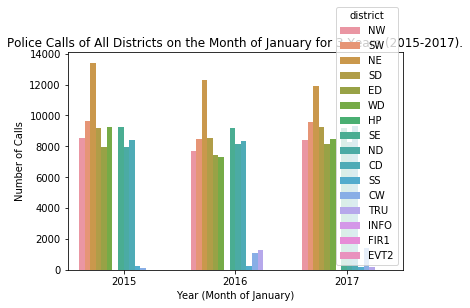

In [116]:
sns.countplot(data=df911A, x='yr', hue='district') #, palette='viridis')
plt.title('Police Calls of All Districts on the Month of January for 3 Years (2015-2017).')
plt.xlabel('Year (Month of January)')
plt.ylabel('Number of Calls')

#x Police Calls of the Top 5 Districts on the Month of January for 3 Years (2015-2017).

Text(0,0.5,'Number of Calls')

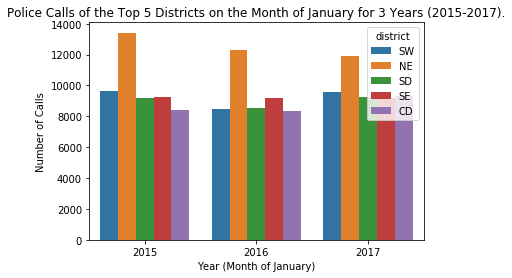

In [117]:
dfD5  =  df911A.query('district in ("NE", "SW", "SE", "SD", "CD")')
sns.countplot(data=dfD5, x='yr', hue='district')
plt.title('Police Calls of the Top 5 Districts on the Month of January for 3 Years (2015-2017).')
plt.xlabel('Year (Month of January)')
plt.ylabel('Number of Calls')

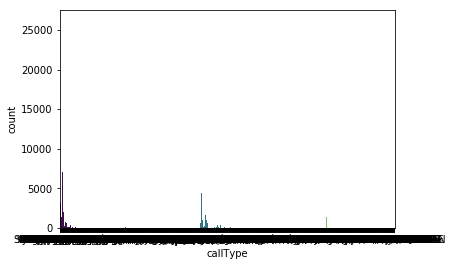

In [30]:
sns.countplot(data=df911A, x='callType', palette='viridis')

# It appears that the callType (description) values need to be cleaned.

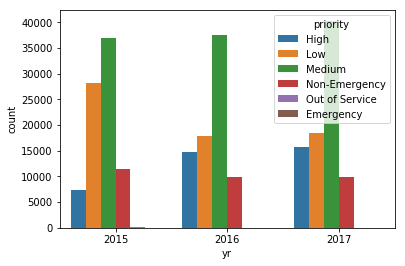

In [38]:
sns.countplot(x='yr', data=df911A, hue='priority') 

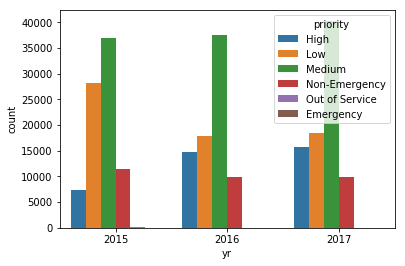

In [44]:
sns.countplot(x='yr', data=df911A, hue='priority') 

In [61]:
df911A['DayOfWeek']= df911A['dT'].apply(lambda tid: tid.dayofweek)
df911A.head()

,priority,district,callType,dT,yr,dy,street,cityState,lat,long,Day of Week,DayOfWeek
callDateTime,,,,,,,,,,,,
01/01/2015 12:01:00 AM,High,NW,Dischrg Firearm,2015-01-01 00:01:00,2015,1,SPAULDING AV,"BALTIMORE, MD",NaN,NaN,3,3
01/01/2015 12:01:00 AM,High,SW,Shooting,2015-01-01 00:01:00,2015,1,3900 ROKEBY RD,"BALTIMORE, MD",39.29935,-76.682006,3,3
01/01/2015 12:01:00 AM,Low,SW,Other,2015-01-01 00:01:00,2015,1,500 N ATHOL AV,"BALTIMORE, MD",39.290987,-76.689237,3,3
01/01/2015 12:02:00 AM,Low,SW,Subject stop,2015-01-01 00:02:00,2015,1,3400 BLK W FRANKLIN ST,"BALTIMORE, MD",39.292746,-76.674521,3,3
01/01/2015 12:02:00 AM,High,SW,Dischrg Firearm,2015-01-01 00:02:00,2015,1,2700 ST BENEDICT ST,"BALTIMORE, MD",39.278843,-76.658288,3,3


In [55]:
df911A.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248503 entries, 01/01/2015 12:01:00 AM to 01/31/2017 11:59:00 PM
Data columns (total 12 columns):
priority       248503 non-null object
district       248503 non-null object
callType       248503 non-null object
dT             248503 non-null datetime64[ns]
yr             248503 non-null int64
dy             248503 non-null int64
street         244702 non-null object
cityState      243620 non-null object
lat            186606 non-null object
long           186606 non-null object
Day of Week    248503 non-null int64
DayOfWeek      248503 non-null int64
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 29.6+ MB


In [62]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df911A['DayOfWeek'] = df911A['DayOfWeek'].map(dmap)
df911A.head()

,priority,district,callType,dT,yr,dy,street,cityState,lat,long,Day of Week,DayOfWeek
callDateTime,,,,,,,,,,,,
01/01/2015 12:01:00 AM,High,NW,Dischrg Firearm,2015-01-01 00:01:00,2015,1,SPAULDING AV,"BALTIMORE, MD",NaN,NaN,3,Thu
01/01/2015 12:01:00 AM,High,SW,Shooting,2015-01-01 00:01:00,2015,1,3900 ROKEBY RD,"BALTIMORE, MD",39.29935,-76.682006,3,Thu
01/01/2015 12:01:00 AM,Low,SW,Other,2015-01-01 00:01:00,2015,1,500 N ATHOL AV,"BALTIMORE, MD",39.290987,-76.689237,3,Thu
01/01/2015 12:02:00 AM,Low,SW,Subject stop,2015-01-01 00:02:00,2015,1,3400 BLK W FRANKLIN ST,"BALTIMORE, MD",39.292746,-76.674521,3,Thu
01/01/2015 12:02:00 AM,High,SW,Dischrg Firearm,2015-01-01 00:02:00,2015,1,2700 ST BENEDICT ST,"BALTIMORE, MD",39.278843,-76.658288,3,Thu


#2015 Police Calls Prioritized on the Day Of Week. 

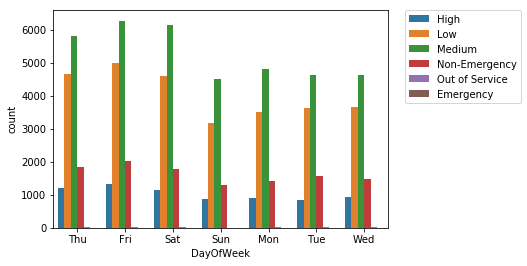

In [66]:
sns.countplot(x="DayOfWeek", data=df911A.loc[df911A.yr == 2015], hue='priority')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

#2016 Police Calls Prioritized on the Day Of Week. 

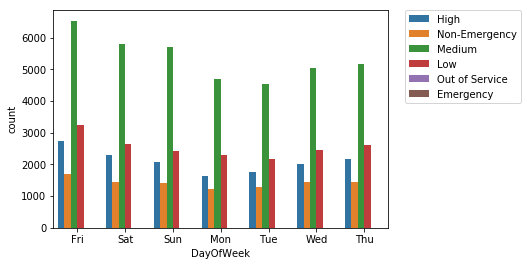

In [67]:
sns.countplot(x="DayOfWeek", data=df911A.loc[df911A.yr == 2016], hue='priority')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

#2017 Police Calls Prioritized on the Day Of Week. 

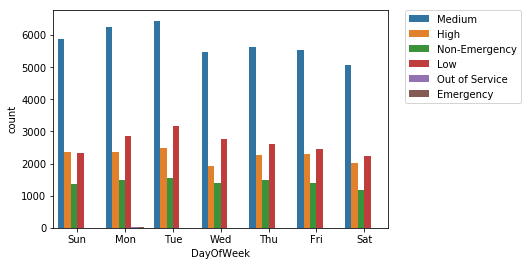

In [68]:
sns.countplot(x="DayOfWeek", data=df911A.loc[df911A.yr == 2017], hue='priority')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

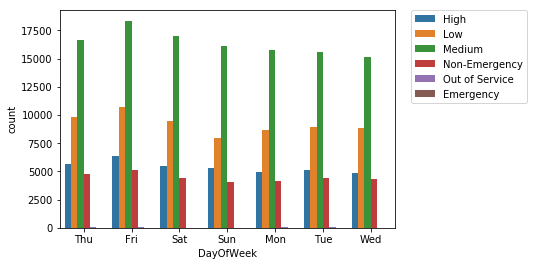

In [69]:
sns.countplot(x="DayOfWeek", data=df911A, hue='priority')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

#2015 Police Calls Prioritized (with High, Medium, Low) on the Day Of the Month (January).

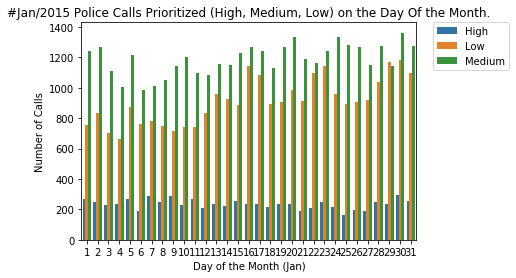

In [106]:
dfP3  =  df911A.query('priority in ("High", "Medium", "Low")')
sns.countplot(x='dy', data=dfP3.loc[dfP3.yr == 2015], hue='priority')
plt.title('#Jan/2015 Police Calls Prioritized (High, Medium, Low) on the Day Of the Month.')
plt.xlabel('Day of the Month (Jan)')
plt.ylabel('Number of Calls')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
#plt.tight_layout()
#dx.head() #chk

#2016 Police Calls Prioritized (with High, Medium, Low) on the Day Of the Month (January).

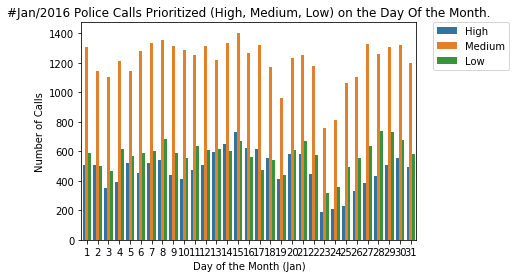

In [107]:
sns.countplot(x='dy', data=dfP3.loc[dfP3.yr == 2016], hue='priority')
plt.title('#Jan/2016 Police Calls Prioritized (High, Medium, Low) on the Day Of the Month.')
plt.xlabel('Day of the Month (Jan)')
plt.ylabel('Number of Calls')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [86]:
#2017 Police Calls Prioritized (with High, Medium, Low) on the Day Of the Month (January).
911/NO  VOICE     26168
Traffic Stop      22486
911/No Voice      15935
DISORDERLY        13229
COMMON ASSAULT     7224

In [135]:
dfT5  =  df911A.query('callType in ("911/NO  VOICE", "Traffic Stop", "911/No Voice", "DISORDERLY", "COMMON ASSAULT")')
dfT5.head()

,priority,district,callType,dT,yr,dy,street,cityState,lat,long,Day of Week,DayOfWeek
callDateTime,,,,,,,,,,,,
01/01/2015 12:04:00 AM,Medium,SW,911/No Voice,2015-01-01 00:04:00,2015,1,500 N ATHOL AV,"BALTIMORE, MD",39.290987,-76.689237,3,Thu
01/01/2015 12:08:00 AM,Medium,SW,911/No Voice,2015-01-01 00:08:00,2015,1,200 S PULASKI ST,"BALTIMORE, MD",39.284971,-76.649894,3,Thu
01/01/2015 12:09:00 AM,Medium,SW,911/No Voice,2015-01-01 00:09:00,2015,1,3200 FREDERICK AV,"BALTIMORE, MD",39.280581,-76.669982,3,Thu
01/01/2015 12:09:00 AM,Low,NW,Traffic Stop,2015-01-01 00:09:00,2015,1,6500 BLK REISTERSTOWN RD,"BALTIMORE, MD",39.356513,-76.702964,3,Thu
01/01/2015 12:10:00 AM,Medium,NW,911/No Voice,2015-01-01 00:10:00,2015,1,6600 PARK HEIGHTS AV,"BALTIMORE, MD",39.3612,-76.698385,3,Thu


Text(0,0.5,'Number of Calls')

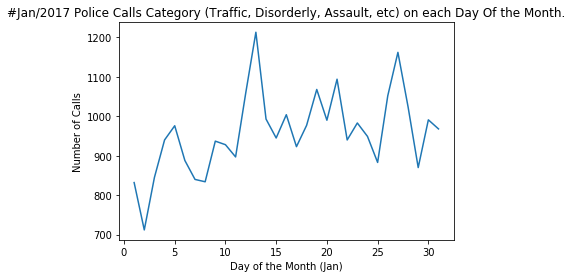

In [134]:
dfT5[dfT5.yr==2017].groupby('dy').count()['callType'].plot()

#dfT5[dfT5['callType']=='Traffic Stop'].groupby('dy').count()['callType'].plot()
#sns.countplot(x='dy', data=dfP3.loc[dfP3.yr == 2017], hue='priority')
plt.title('#Jan/2017 Police Calls Category (Traffic, Disorderly, Assault, etc) on each Day Of the Month.')
plt.xlabel('Day of the Month (Jan)')
plt.ylabel('Number of Calls')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

dfD5  =  df911A.query('district in ("NE", "SW", "SE", "SD", "CD")')
sns.countplot(data=dfD5, x='yr', hue='district')
plt.title('Police Calls of the Top 5 Districts on the Month of January for 3 Years (2015-2017).')
plt.xlabel('Year (Month of January)')
plt.ylabel('Number of Calls')

In [ ]:
dfD5  =  df911A.query('district in ("NE", "SW", "SE", "SD", "CD")')
sns.countplot(data=dfD5, x='yr', hue='district')
#plt.title('Police Calls of the Top 5 Districts on the Month of January for 3 Years (2015-2017).')
#plt.xlabel('Year (Month of January)')
#plt.ylabel('Number of Calls')

In [ ]:
sns.countplot(x='dy', data=dfD5.loc[dfP3.yr == 2017], hue='callType')
plt.title('#Jan/2017 Police Calls Prioritized (High, Medium, Low) on the Day Of the Month.')
plt.xlabel('Day of the Month (Jan)')
plt.ylabel('Number of Calls')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

dfP3  =  df911A.query('priority in ("High", "Medium", "Low")')
sns.countplot(x='dy', data=dfP3.loc[dfP3.yr == 2015], hue='priority')

dfD5  =  df911A.query('district in ("NE", "SW", "SE", "SD", "CD")')
sns.countplot(data=dfD5, x='yr', hue='district')

byDate = df1.groupby(df1['Date']).count()['lat']
byDate.head()

In [128]:
dfDay = df911A.groupby([df911A.yr, df911A.dy]).count()
dfDay.tail()

priority  district  callType    dT  street  cityState   lat  long  \
yr   dy                                                                      
2017 27      2958      2958      2958  2958    2902       2887  2140  2140   
     28      2756      2756      2756  2756    2696       2688  2054  2054   
     29      2452      2452      2452  2452    2385       2374  1797  1797   
     30      2695      2695      2695  2695    2631       2615  1964  1964   
     31      2751      2751      2751  2751    2696       2684  1993  1993   

         Day of Week  DayOfWeek  
yr   dy                          
2017 27         2958       2958  
     28         2756       2756  
     29         2452       2452  
     30         2695       2695  
     31         2751       2751

dfDay.priority.plot(x='dy', hue='yr', kind='line')
plt.tight_layout()

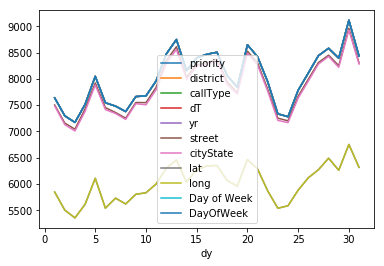

In [120]:
dfDay.plot()

# STOP! 
# WORK AREA BELOW:
#If you need to know how many rows there are with "one or more NaNs":
df.isnull().T.any().T.sum()

#Or if you need to pull out these rows and examine them:
nan_rows = df[df.isnull().T.any().T]

0    False
1     True
2    False
3     True
4    False
5     True
dtype: bool
df.isnull().any().any() #.any() will tell you if any of the above are True

#to get the total number of NaN values in the DataFrame:
df.isnull().sum().sum()

# To find out which rows have NaNs in a specific column:
nan_rows = df[df['column'].isnull()]

#To find out which rows do not have NaNs in a specific column: 
non_nan_rows = df[df['column'].notnull()]

#To find out which rows have NaNs:
nan_rows = df[df.isnull().any(1)] #any(axis=1)

T(all(isnan(T{:,2:4}),2),:)

In [80]:
#df911A.isnull().T.any().T.sum() #rows=61897
#df911A[df911A.isnull().T.any().T] #61897 rows/10 col; Nan latlong
#df911A.isnull().any().any() #True , any of the rows/cols is True
#df911A.isnull().count().count() #=10??? #.sum().sum()
#df911A[df911A['lat'].isnull()] #which rows have NaNs in a specific col, #nan_rows
#df911A[df911A['long'].isnull()] #61897 #nan_rows
#df911A.count()  #248503
#df911A[df911A['lat'].notnull()]  #186606 
#df911A[df911A.isnull().any(1)]    #61897 
#for series: df911A(all(isnan(df911A{:,2:4}),2),:)
#df911A.callType.unique()  
###array(['Dischrg Firearm', 'Shooting', 'Other', ..., 'SCREAMING WOMAN', 
  #'SERVE PEACE ORDE', 'OVERDOSE /POSS'], dtype=object)
#df911A.district.unique()  
###array(['NW', 'SW', 'NE', 'SD', 'ED', 'WD', 'HP', 'SE', 'ND', 'CD', 'SS',
  #     'CW', 'TRU', 'INFO', 'FIR1', 'EVT2'], dtype=object) #=16
#df911A.priority.unique()  
###array(['High', 'Low', 'Medium', 'Non-Emergency', 'Out of Service',
  #     'Emergency'], dtype=object)
#df911A.priority.value_counts()  #<<< 
 #Medium            114701
 #Low                64507
 #High               37790
 #Non-Emergency      31269
 #Out of Service       174
 #Emergency             62
df911A.priority.value_counts()  #<<< 

df1['Hour']= df1['timeStamp'].apply(lambda tid: tid.hour)
df1['Month']= df1['timeStamp'].apply(lambda tid: tid.month)
df1['Day of Week']= df1['timeStamp'].apply(lambda tid: tid.dayofweek)
df1.head()

#df911A.district.value_counts()  #<<< 
 #NE      37615
 #SW      27717
 #SE      27609
 #SD      27006
 #CD      26087
 #WD      25023
 #NW      24655
 #ND      24381
 #ED      23551
 #CW       2638
 #TRU      1509
 #SS        699
 #EVT2        6
 #INFO        4
 #HP          2
 #FIR1        1
#df911A.callType.value_counts()  #<<< 
 #Upper/lower case: ex: 911/No Voice, COMMON ASSAULT, Other, AUTO ACCIDENT, *INVESTIGATE
 #Del Row: TEST CALL, 
 #
 #
 #df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])    

NE      37615
SW      27717
SE      27609
SD      27006
CD      26087
WD      25023
NW      24655
ND      24381
ED      23551
CW       2638
TRU      1509
SS        699
EVT2        6
INFO        4
HP          2
FIR1        1
Name: district, dtype: int64

In [19]:
df911A.district.nunique() # 16 
###array(['NW', 'SW', 'NE', 'SD', 'ED', 'WD', 'HP', 'SE', 'ND', 'CD', 'SS',
  #     'CW', 'TRU', 'INFO', 'FIR1', 'EVT2'], dtype=object) #=16


16

In [11]:
'''
df.groupby(['id', 'group', 'term']).count()
print (pd.crosstab([df.id, df.group], df.term))
df.groupby(['id', 'group', 'term'])['term'].size().unstack(fill_value=0)
df = pd.concat([df]*10000).reset_index(drop=True)

In [48]: %timeit (df.groupby(['id', 'group', 'term']).size().unstack(fill_value=0))
100 loops, best of 3: 12.4 ms per loop

In [49]: %timeit (df.groupby(['id', 'group', 'term'])['term'].size().unstack(fill_value=0))
100 loops, best of 3: 12.2 ms per loop

df911.set_index('dT', drop=True)
df911.sort_values(by='dT', inplace=True)
df911.head(6) #chk
'''
# 7 Check groups as:
df = df911A.groupby(['yr', 'priority']).count()
df.head()
    

callDateTime  district  callType  location     dT     dy  \
yr   priority                                                                  
2015 Emergency                24        24        24        24     24     24   
     High                   7287      7287      7287      7278   7287   7287   
     Low                   28262     28262     28262     28258  28262  28262   
     Medium                36870     36870     36870     36870  36870  36870   
     Non-Emergency         11414     11414     11414     11409  11414  11414   

                    street  cityState  latLong  
yr   priority                                   
2015 Emergency          24         24       17  
     High             7278       7278     5625  
     Low             28258      28246    19787  
     Medium          36870      36846    31295  
     Non-Emergency   11409      11290     9203

In [12]:
df = df9115.groupby(['yr', 'priority']).count()
df.head()

KeyError: 'yr'

In [53]:
df = df9116.groupby(['yr', 'priority']).count()
df.head()

callDateTime  district  callType  location     dT
yr priority                                                        
   Emergency                12        12        12        12     12
   High                  14743     14743     14743     14728  14743
   Low                   17826     17826     17826     17724  17826
   Medium                37516     37516     37516     37397  37516
   Non-Emergency          9971      9971      9971      8201   9971

In [52]:
df = df9117.groupby(['yr', 'priority']).count()
df.head()

callDateTime  district  callType  location     dT
yr priority                                                        
   Emergency                26        26        26        25     26
   High                  15760     15760     15760     15713  15760
   Low                   18419     18419     18419     18308  18419
   Medium                40315     40315     40315     40225  40315
   Non-Emergency          9884      9884      9884      8356   9884

In [13]:
df = df911A.groupby(['yr', 'callType']).count()
df.head()

callDateTime  priority  district  location  dT  dy  \
yr   callType                                                               
2015 *# CONTROL PURCH             1         1         1         1   1   1   
     *#5G                         1         1         1         1   1   1   
     *#CONTROL PURCHA             1         1         1         1   1   1   
     *#EP                         1         1         1         1   1   1   
     *#TRAFIC ARREST              1         1         1         1   1   1   

                       street  cityState  latLong  
yr   callType                                      
2015 *# CONTROL PURCH       1          1        1  
     *#5G                   1          1        1  
     *#CONTROL PURCHA       1          1        1  
     *#EP                   1          1        1  
     *#TRAFIC ARREST        1          1        1

In [14]:
df = df911A.groupby(['yr', 'district']).count()
df

callDateTime  priority  callType  location     dT     dy  \
yr   district                                                             
2015 CD                8400      8400      8400      8397   8400   8400   
     CW                 130       130       130       130    130    130   
     ED                7927      7927      7927      7923   7927   7927   
     HP                   2         2         2         2      2      2   
     ND                7963      7963      7963      7962   7963   7963   
     NE               13415     13415     13415     13415  13415  13415   
     NW                8551      8551      8551      8551   8551   8551   
     SD                9192      9192      9192      9191   9192   9192   
     SE                9280      9280      9280      9275   9280   9280   
     SS                 228       228       228       228    228    228   
     SW                9626      9626      9626      9626   9626   9626   
     WD                9280      9280      9280      9276   9280   9280   
2016 CD                8373      8373      8373      8297   8373   8373   
     CW                1074      1074      1074      1046   1074   1074   
     ED                7463      7463      7463      7292   7463   7463   
     EVT2                 6         6         6         6      6      6   
     FIR1                 1         1         1         1      1      1   
     INFO                 4         4         4         4      4      4   
     ND                8127      8127      8127      7919   8127   8127   
     NE               12264     12264     12264     11883  12264  12264   
     NW                7712      7712      7712      7561   7712   7712   
     SD                8559      8559      8559      8266   8559   8559   
     SE                9161      9161      9161      9003   9161   9161   
     SS                 269       269       269       268    269    269   
     SW                8490      8490      8490      8203   8490   8490   
     TRU               1300      1300      1300      1296   1300   1300   
     WD                7284      7284      7284      7036   7284   7284   
2017 CD                9314      9314      9314      9224   9314   9314   
     CW                1434      1434      1434      1403   1434   1434   
     ED                8161      8161      8161      7977   8161   8161   
     ND                8291      8291      8291      8099   8291   8291   
     NE               11936     11936     11936     11710  11936  11936   
     NW                8392      8392      8392      8261   8392   8392   
     SD                9255      9255      9255      9023   9255   9255   
     SE                9168      9168      9168      9086   9168   9168   
     SS                 202       202       202       199    202    202   
     SW                9601      9601      9601      9294   9601   9601   
     TRU                209       209       209       209    209    209   
     WD                8459      8459      8459      8160   8459   8459   

               street  cityState  latLong  
yr   district                              
2015 CD          8397       8374     5961  
     CW           130        130      112  
     ED          7923       7914     6560  
     HP             2          2        2  
     ND          7962       7941     6209  
     NE         13415      13412    10702  
     NW          8551       8549     7093  
     SD          9191       9182     7224  
     SE          9275       9258     7431  
     SS           228        228      181  
     SW          9626       9560     7767  
     WD          9276       9271     6815  
2016 CD          8297       8186     5520  
     CW          1046       1035      826  
     ED          7292       7267     5778  
     EVT2           6          6        4  
     FIR1           1          1        0  
     INFO           4          4        4  
     ND          7919       7879     5716  
     NE        

In [21]:
# Set the index, Sort
#DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
df911A.set_index(['yr', 'dy'], drop=True)
df911A.sort_values(['yr', 'dy'], inplace=True)
df911A.head(6)

,callDateTime,priority,district,callType,location,dT,yr,dy,street,cityState,latLong
1106565,01/01/2015 12:01:00 AM,High,NW,Dischrg Firearm,"SPAULDING AV\nBALTIMORE, MD",2015-01-01 00:01:00,2015,1,SPAULDING AV,"BALTIMORE, MD",NaN
357881,01/01/2015 12:01:00 AM,High,SW,Shooting,"3900 ROKEBY RD\nBALTIMORE, MD\n(39.29935, -76....",2015-01-01 00:01:00,2015,1,3900 ROKEBY RD,"BALTIMORE, MD","(39.29935, -76.682006)"
359329,01/01/2015 12:01:00 AM,Low,SW,Other,"500 N ATHOL AV\nBALTIMORE, MD\n(39.290987, -76...",2015-01-01 00:01:00,2015,1,500 N ATHOL AV,"BALTIMORE, MD","(39.290987, -76.689237)"
359125,01/01/2015 12:02:00 AM,Low,SW,Subject stop,"3400 BLK W FRANKLIN ST\nBALTIMORE, MD\n(39.292...",2015-01-01 00:02:00,2015,1,3400 BLK W FRANKLIN ST,"BALTIMORE, MD","(39.292746, -76.674521)"
359340,01/01/2015 12:02:00 AM,High,SW,Dischrg Firearm,"2700 ST BENEDICT ST\nBALTIMORE, MD\n(39.278843...",2015-01-01 00:02:00,2015,1,2700 ST BENEDICT ST,"BALTIMORE, MD","(39.278843, -76.658288)"
358628,01/01/2015 12:02:00 AM,High,NE,Dischrg Firearm,"3000 18 ECHODALE AV\nBALTIMORE, MD\n(39.349622...",2015-01-01 00:02:00,2015,1,3000 18 ECHODALE AV,"BALTIMORE, MD","(39.349622, -76.562828)"


In [56]:
#df = df911A.groupby(['yr', 'dy', 'district']).count()                # syntax OK
#df = df911A.groupby(['yr', 'dy', 'district'])['callDateTime'].sum() # syntax !OK
#df = df911A.groupby(['yr', 'dy', 'district'])['callDateTime'].count() # syntax OK
#df = df911A.crosstab([df.yr, df.dy], df.priority) #'])['callDateTime'].count() # syntax OK
#import timeit #%%timeit # do it 100x; -n 100

df = df911A.groupby(['yr', 'dy', 'priority'])['callDateTime'].count() # syntax OK
df.columns = ['yr', 'dy', 'priority', 'count']
df

yr    dy  priority      
2015  1   Emergency            1
          High               267
          Low                754
          Medium            1243
          Non-Emergency      280
          Out of Service       4
      2   High               247
          Low                832
          Medium            1268
          Non-Emergency      254
          Out of Service       2
      3   High               230
          Low                701
          Medium            1107
          Non-Emergency      218
          Out of Service       2
      4   Emergency            1
          High               238
          Low                666
          Medium            1004
          Non-Emergency      282
          Out of Service       1
      5   High               270
          Low                873
          Medium            1213
          Non-Emergency      333
          Out of Service       5
      6   High               189
          Low                762
          Medium  

In [50]:
df.columns = ['yr', 'dy', 'priority', 'counts']
df.columns

['yr', 'dy', 'priority', 'counts']

In [52]:
df.head()

yr    dy  priority     
2015  1   Emergency           1
          High              267
          Low               754
          Medium           1243
          Non-Emergency     280
Name: callDateTime, dtype: int64

In [1]:
#import timeit ##, fill_value=0) #, aggfunc = 'size'
#%%timeit
#df = df911A.pivot_table(['yr', 'dy'], columns = 'priority') #, fill_value=0) #, aggfunc = 'size'
df = df911A.pivot_table(index=['yr']
                        , columns = ['dy'] 
                        #, aggfunc = [np.count] 
                        , values = 'callDateTime'
                        , fill_na = 0
                        , margins = True
                        , dorpna = True)
df

NameError: name 'df911A' is not defined

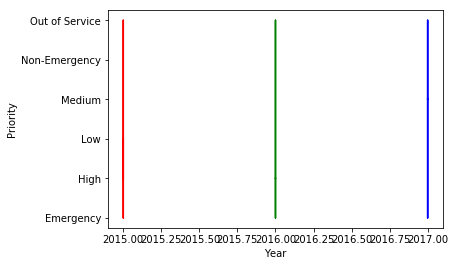

"plt.savefig('axis_limits.png')\n\nplt.title('Undergraduate enrollment of women')\nplt.show()\n"

In [34]:
#plt.plot(df9115.yr, df9115.priority, color='red')
#plt.plot(df9116.yr, df9116.priority, color='green')
#plt.plot(df9117.yr, df9117.priority, color='blue')
#plt.axis((1990,2010,0,50))
#plt.plot(df911A.yr, df911A.priority, color='red')
#plt.plot([df911A.yr for yr in df911A.yr if df911A.yr == 2015], df911A.priority, color='red')
#plt.plot(df911A.loc[df911A.yr == 2015], df911A.priority, color='red')
#plt.plot(df911A.yr, df911A.priority, color='red')
#plt.plot(df911A.yr, df911A.priority, color='red')

plt.plot(df9115.yr, df9115.priority, color='red', label='Priority')
plt.plot(df9116.yr, df9116.priority, color='green', label='Priority')
plt.plot(df9117.yr, df9117.priority, color='blue', label='Priority')
plt.title('911 Police Calls - Priority by Year')
plt.ylabel('Priority')
plt.xlabel('Year')
plt.legend(loc='lower right')
plt.show()
# Save the figure as 'axis_limits.png'
#plt.savefig('axis_limits.png')

In [ ]:
ax1 = df.plot(x=['TIME'], y=['Column A'], kind='bar', color='r', legend=False)
ax1.set_ylabel("Label A")
ax2 = ax1.twinx()
ax2.plot(df['Column B'].values, linestyle='-', marker='o', linewidth=2.0, color ='b', label="test2")
ax2.set_ylabel("Label B")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)

In [ ]:
ax1 = df9117.plot(df9117.yr, df9117.callType, color='b', legend=False)
ax1.set_ylabel("callType")
ax2 = ax1.twinx()
ax2.plot(df['Priority'].values, linestyle='-', marker='o', linewidth=2.0, color ='b', label="Priority")
ax2.set_ylabel("Year")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)
ax2.show()

In [ ]:
#df = pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
#g = sns.relplot(x="hr", y="callDateTime", kind="line", data=df)
#g.fig.autofmt_xdate()

g = sns.lmplot(x='yr', y='priority', data=df)# .loc[df.yr == '2015']) #kind="line", 
#err: AttributeError: 'Series' object has no attribute 'yr'

#g = sns.lmplot(x=['yr','dy'], y='priority', data=df)# .loc[df.yr == '2015']) #kind="line", 
#TypeError: '<' not supported between instances of 'str' and 'list'

g = sns.FacetGrid(df, row='priority', col='yr')
g.map(sns.distplot, 'dy')
plt.show()
'''
g = sns.FacetGrid(titanic, row='survived', col='class')
g.map(sns.distplot, "age")
plt.show()'''#plt.plot(df9115.yr, df9115.callType, color='red', label='callType')
#plt.plot(df9116.yr, df9116.callType, color='green', label='callType')
plt.plot(df9117.yr, df9117.callType.count(), color='blue', label='callType')
plt.title('911 Police Calls - callType by Year')
plt.ylabel('callType')
plt.xlabel('Year')
plt.legend(loc='lower right')
plt.show()

In [ ]:
df.groupby(['id', 'group', 'term']).count()

In [ ]:
plt.plot(df911A.yr, df911A.loc[df911A.priority=='High'], color='red', label='Priority')
#plt.plot(df9116.yr, df9116.priority, color='green', label='Priority')
#plt.plot(df9117.yr, df9117.priority, color='blue', label='Priority')
plt.title('911 Police Calls - Priority by Year')
plt.ylabel('Priority')
plt.xlabel('Year')
plt.legend(loc='lower right')
plt.show()

S:\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


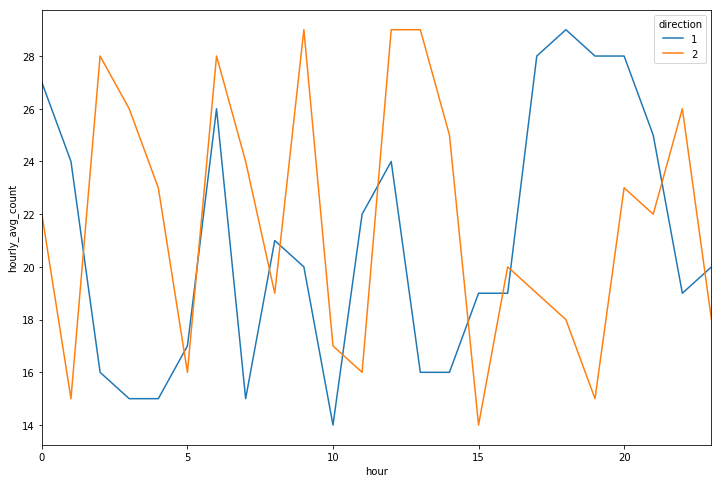

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

hour, direction = np.meshgrid(np.arange(24), np.arange(1,3))
df = pd.DataFrame({"hour": hour.flatten(), "direction": direction.flatten()})
df["hourly_avg_count"] = np.random.randint(14,30, size=len(df))

plt.figure(figsize=(12,8))
sns.tsplot(df, time='hour', unit = "direction", 
               condition='direction', value='hourly_avg_count')

plt.show()

In [47]:
df.groupby(['id', 'group', 'term']).count()

,direction,hour,hourly_avg_count
0,1,0,27
1,1,1,24
2,1,2,16
3,1,3,15
4,1,4,15


In [ ]:
df9115['yr'] = pd.DatetimeIndex(df9115.dT).year
df9116['yr'] = pd.DatetimeIndex(df9116.dT).year
df9117['yr'] = pd.DatetimeIndex(df9117.dT).year

df9115['dy'] = pd.DatetimeIndex(df9115.dT).day
df9116['dy'] = pd.DatetimeIndex(df9116.dT).day
df9117['dy'] = pd.DatetimeIndex(df9117.dT).day
df9117.tail() #chk